# Gearbox in range 0 - 2200 Hz

In [1]:
! git checkout calc-rms-for-shorter-interval


M	src/exploring_time_frequency/RMS_bins_gearbox_0_2200_hz.ipynb
M	src/exploring_time_frequency/wtg02_all_signals_time_domain.ipynb
Already on 'calc-rms-for-shorter-interval'
Your branch is up to date with 'origin/calc-rms-for-shorter-interval'.


In [2]:
import numpy as np
from matplotlib.collections import PolyCollection
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random
import sys, os

ROOT_PATH = os.path.abspath("..").split("data_processing")[0]
print("ROOT", ROOT_PATH)
module_path = os.path.abspath(os.path.join(ROOT_PATH+"/utils/"))
if module_path not in sys.path:
    print("appended")
    sys.path.append(module_path)

import functions as f

module_path = os.path.abspath(os.path.join(ROOT_PATH+"/data_processing/"))
if module_path not in sys.path:
    print("appended")
    sys.path.append(module_path)
import wt_data
import ff_transform

ROOT /Users/stianismar/Dropbox/gitProsjekter/master-thesis/src
appended
appended
ROOT /Users/stianismar/Dropbox/gitProsjekter/master-thesis/src
/Users/stianismar/Dropbox/gitProsjekter/master-thesis/src


In [5]:
'''
wt_name is either 'WTG01', 'WTG02', 'WTG03', or 'WTG04'

'''
def load_interval(wt_name, BINS,SENSOR_NAME,lower_range_freq,higher_range_freq, load_minimal=False):
    wt_instance = wt_data.load_instance(wt_name, load_minimal=False)
    print(f"This is the amount of intervals: {len(wt_instance.ten_second_intervals)}")
    
    y = []
    x = []
    z = []
    
    avg_powers = [] # Stores the average power for each interval
    
    
    two_d_plot = d = [[] for x in range(BINS)]
    
    avg_rot_speeds = []
    
    i = 0
    for interval in wt_instance.ten_second_intervals:
        ts = interval.sensor_df['TimeStamp']  # Have this as the y-axis to see how the RMS/frequencies develop
        try:
            vibration_signal = interval.sensor_df[SENSOR_NAME]
        except:
            continue


        y_repeated = np.repeat(i, 50)  # Repeat this y value n times to use as the y value for the corresponding x (frequency) and z (magnitude)
        y.append(y_repeated)
        i = i + 1

        comp_type = 'gearbox'
        
        rot_data = interval.high_speed_rot_data
        avg_rot_speed = rot_data['mean']
        avg_rot_speeds.append(avg_rot_speed)
        
        
        
        avg_power = interval.op_df["PwrAvg;kW"][0]
        rot_data = interval.high_speed_rot_data
        
        fast = ff_transform.FastFourierTransform( vibration_signal, ts, comp_type)
        fft, time, centroid, rms, rms_bins, bin_freq = fast.fft_transform_time(
            rot_data,
            avg_power,
            get_rms_for_bins=True,
            plot=False,
            bins=BINS,
            plot_bin_lines=False,
            x_lim=False,
            frequency_lines=[],
            horisontal_lines=[],
            spectrum_lower_range = lower_range_freq,
            spectrum_higher_range = higher_range_freq
            )
        N = fast.s.size
        T = fast.t[1] - fast.t[0]
        f = np.linspace(0, 1 / T, N, )
        f = f[:N // 2]

        z.append(rms_bins)
        x.append(bin_freq)
        avg_powers.append(interval.op_df['PwrAvg;kW'][0])
        
        for j, rms_amplitude in enumerate(rms_bins):
            two_d_plot[j].append(rms_amplitude)
        
        

        
    x = np.array(x)
    y = np.array(y)
    z = np.array(z)
    return x,y,z, two_d_plot, avg_powers, avg_rot_speeds


Loading WTG01...
Loaded WTG01
This is the amount of intervals: 415


/Users/stianismar/Dropbox/gitProsjekter/master-thesis/src/data_processing/ff_transform.py:289: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  amp = fft_modulus_norm[filter_indexes]
/Users/stianismar/Dropbox/gitProsjekter/master-thesis/src/data_processing/ff_transform.py:252: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  f = f[filter_indexes]
/Users/stianismar/Dropbox/gitProsjekter/master-thesis/src/data_processing/ff_transform.py:253: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)

ValueError: x and y must have same first dimension, but have shapes (50,) and (49,)

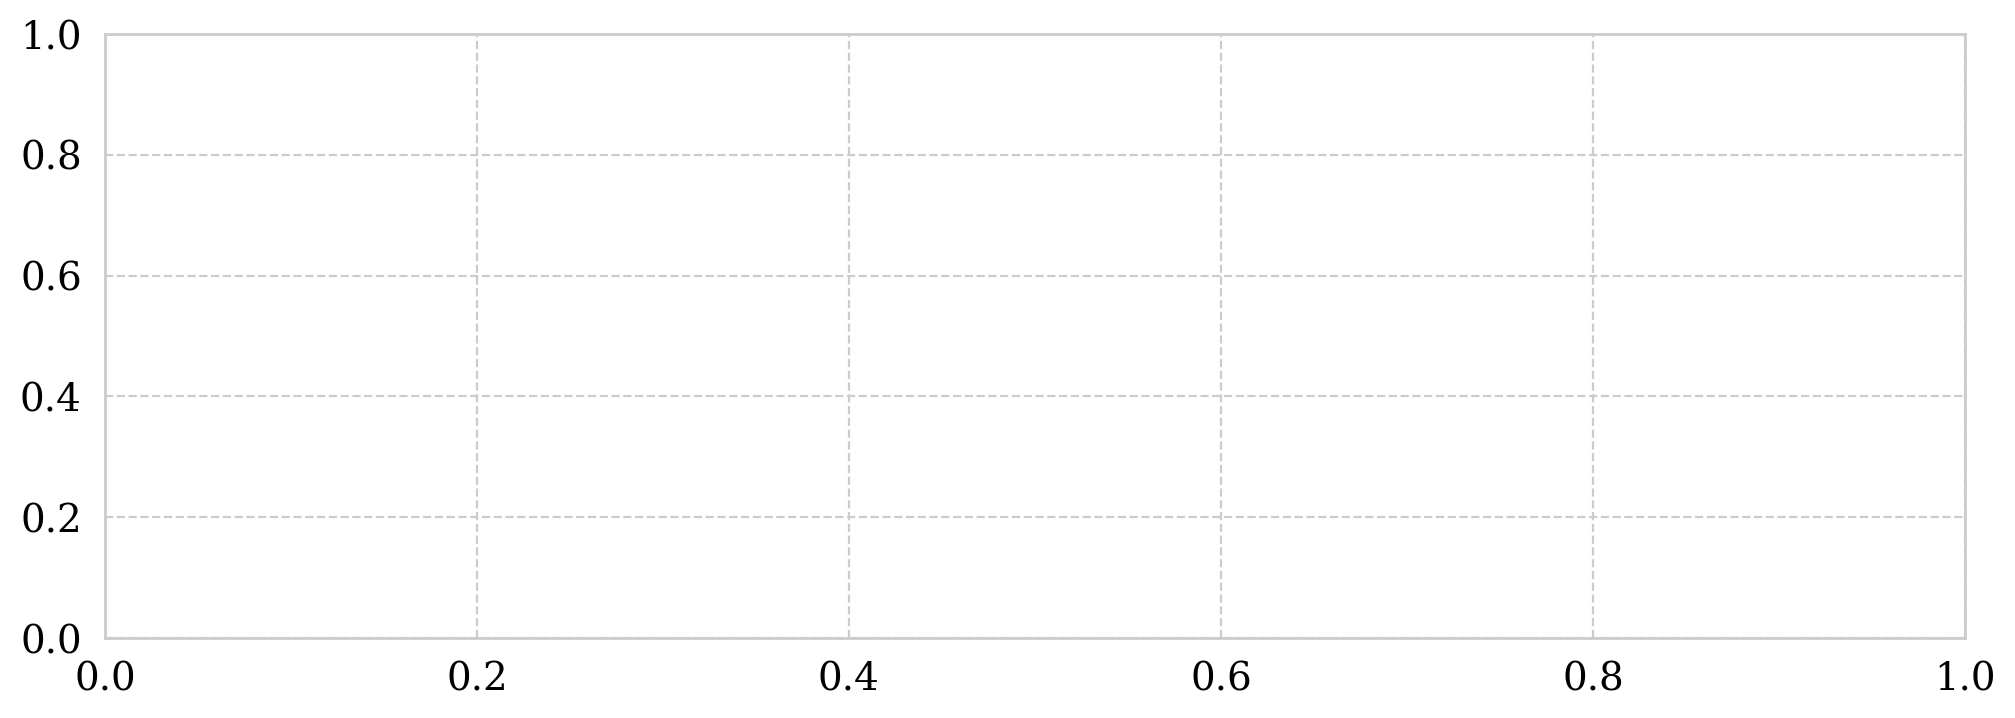

In [9]:
WIND_TURBINE = 'WTG01'
SENSOR_NAME = 'GbxHssRr;0,0102;m/s2'
BINS = 50

freqs_wt01, interval_nums_wt01, rms_amplitudes_wt01,two_d_plot_tw01, avg_powers_wt01, avg_rot_speeds1 = load_interval(
    WIND_TURBINE,
    BINS,
    SENSOR_NAME,
    lower_range_freq = 0,
    higher_range_freq = 2200,
    load_minimal=False
    )
print(freqs_wt01.shape)
print(rms_amplitudes_wt01.shape)
print(interval_nums_wt01.shape)